In [129]:
%run myCode.ipynb

In [3]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    print('\n')
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    print('\n')
    
    if dfoutput['p-value'] < 0.05:
        print('Strong evidence against the null hypothesis')
        print('We reject the null hypothesis')
        print('Series has no unit root & is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('We fail to reject the null hypothesis')
        print('Series has unit root and is non-stationary')
        
##############################################################
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    print('\n')
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
    print('\n')
    
    if kpss_output['p-value'] < 0.05:
        print('Strong evidence against the null hypothesis')
        print('We reject the null hypothesis')
        print('Series has unit root and is non-stationary')
    else:        
        print('Weak evidence against the null hypothesis')
        print('We fail to reject the null hypothesis')
        print('Series has no unit root & is stationary')



In [4]:
dfAttacks = pd.read_csv("SharkWrangler4.csv")

In [5]:
type(dfAttacks.Date[0])

str

In [29]:
dfAttacks.head(5)

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,Species,SharkSpecies,full_location,latitude,longitude,pos,Timeslot,Zone,latitude_rad,longitude_rad
0,2023.03.19,2023-03-19,2023,Unprovoked,USA,Hawaii,Anaehoomalu Bay,Swimming,male,M,...,NaN,unknown,"Anaehoomalu Bay, Hawaii, USA",19.916124,-155.893224,"(19.9161242, -155.8932242)",Midday,TROPIC OF CANCER,0.347602,-2.720850
1,2023.03.16,2023-03-16,2023,Unprovoked,AUSTRALIA,Western Australia,Cheynes Beach,Surf-sking,female,F,...,5m to 6m shark,unknown,"Cheynes Beach, Western Australia, AUSTRALIA",-34.787401,118.417953,"(-34.787401, 118.4179532)",Morning,POLAR,-0.607155,2.066783
2,2023.03.08,2023-06-03,2023,Unprovoked,BRAZIL,Pernambuco,Piedade Beach,Swimming,Kaylane Timóteo Freitas,F,...,NaN,unknown,"Piedade Beach, Pernambuco, BRAZIL",-8.167114,-34.913273,"(-8.1671139, -34.91327260000001)",Afternoon,TROPIC OF CAPRICORN,-0.142543,-0.609352
3,2023.03.05,2023-05-03,2023,Unprovoked,BRAZIL,Pernambuco,Piedade Beach,Swimming,male,M,...,NaN,unknown,"Piedade Beach, Pernambuco, BRAZIL",-8.167114,-34.913273,"(-8.1671139, -34.91327260000001)",Afternoon,TROPIC OF CAPRICORN,-0.142543,-0.609352
4,2023.03.02,2023-02-03,2023,Unprovoked,SEYCHELLES,Praslin Island,NaN,Snorkeling,Arthur …,M,...,Lemon shark,lemon,"Praslin Island, SEYCHELLES",-4.332591,55.746726,"(-4.3325908, 55.74672589999999)",Afternoon,TROPIC OF CAPRICORN,-0.075618,0.972964


In [145]:
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import statsmodels.api as sm

In [7]:
from statsmodels.tsa.stattools import adfuller, kpss

In [9]:
date_column = dfAttacks['Date']


# regex pattern for 'dd/mm/yyyy' format
pattern = r'\d{1,2}/\d{1,2}/\d{4}'

# find all occurrences that do not match the pattern
non_matches = date_column[~date_column.str.match(pattern, na=False)]

# print the non-matching occurrences
print(non_matches)

6018    1899-12-18
6019    1899-11-20
6020    1899-10-28
6021    1899-10-12
6022    1899-10-12
           ...    
6574    1733-01-01
6575    1723-01-01
6576    1721-06-01
6577    1703-03-26
6578    1703-03-26
Name: Date, Length: 561, dtype: object


In [10]:
dfAttacks['Date'] = pd.to_datetime(dfAttacks['Date'], errors='coerce') # convert the date column to datetime format
dfAttacks['Date'] = dfAttacks['Date'].dt.strftime('%d/%m/%Y') # convert the datetime format to 'dd/mm/yyyy'

In [11]:
dfAttacks['Date'] = pd.to_datetime(dfAttacks['Date'], errors='coerce')

In [12]:
dfAttacks['Year'] = dfAttacks['Date'].dt.year

In [13]:
dtYEAR = dfAttacks.groupby('Year')['Year'].count()

In [14]:
dtYEAR

Year
1703      2
1721      1
1723      1
1733      1
1738      1
       ... 
2019    112
2020    100
2021    109
2022     97
2023     15
Name: Year, Length: 237, dtype: int64

In [133]:
dfDATE=dfAttacks.groupby('Date')['Date'].count()

In [16]:
dfDATE

Date
1703-03-26    2
1721-01-06    1
1723-01-01    1
1733-01-01    1
1738-06-04    1
             ..
2023-03-19    1
2023-04-02    2
2023-05-01    1
2023-05-03    1
2023-06-03    1
Name: Date, Length: 5491, dtype: int64

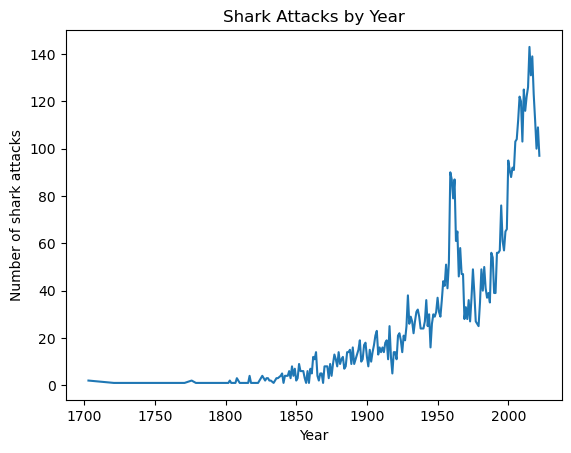

In [68]:
df_by_year = dfAttacks.groupby(dfAttacks['Year']).size().reset_index(name='NumAttacks') #2023 is skewing my results
df_by_year = df_by_year[df_by_year['Year'] != 2023]

# Create a line plot of the sum of attacks per year
plt.plot(df_by_year['Year'], df_by_year['NumAttacks'])
plt.xlabel('Year')
plt.ylabel('Number of shark attacks')
plt.title('Shark Attacks by Year')
plt.show()



In [88]:
type(df_by_year['Year'][0])

numpy.int64

In [89]:
dfy = df_by_year.copy()


In [90]:
# Convert the Year column to datetime
dfy['Year'] = pd.to_datetime(dfy['Year'], format='%Y')



In [91]:
print(type(dfy['Year'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [92]:
##Analysis## is there any trend or period 
# Set the Year column as the index
dfy.set_index('Year', inplace=True)

In [93]:
dfy.index = pd.to_datetime(dfy.index)
dfy = dfy.asfreq('YS')

In [94]:
dfy

,NumAttacks
Year,
1703-01-01,2.0
1704-01-01,NaN
1705-01-01,NaN
1706-01-01,NaN
1707-01-01,NaN
...,...
2018-01-01,123.0
2019-01-01,112.0
2020-01-01,100.0


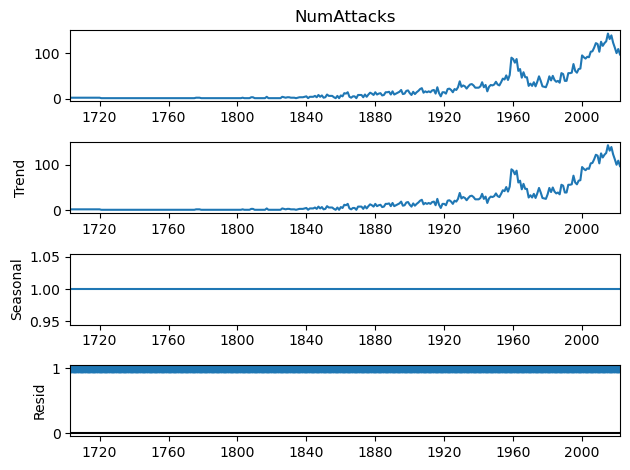

In [95]:
#Need to fillin missing values using forward fill routine
dfy['NumAttacks'].fillna(method='ffill', inplace=True)
seasonal_decompose(dfy['NumAttacks'], model='mul').plot();

In [96]:
##There is no seasonal component
#We will use auto arima to determine the best fit model 
auto_arima(dfy['NumAttacks'],trace=True,seasonal=False,m=12).summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2074.195, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2095.802, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2072.712, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2072.522, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2094.487, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2074.267, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2074.367, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2072.515, Time=0.72 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2076.984, Time=0.49 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2075.475, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2075.689, Time=0.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2075.486, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2071.972, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2073.790, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  320
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1031.986
Date:                Mon, 03 Apr 2023   AIC                           2071.972
Time:                        14:25:25   BIC                           2087.033
Sample:                    01-01-1703   HQIC                          2077.987
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9565      0.044    -21.722      0.000      -1.043      -0.870
ma.L1          0.6800      0.065     10.395      0.000       0.552       0.808
ma.L2         -0.2166      0.047     -4.599      0.000      -0.309      -0.124
sigma2        37.7759      1.385     27.280      0.000      35.062      40.490
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1227.88
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):            1160.31   Skew:                             1.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
#model has statistically significant coefficients, log likelyhood absolute value is quite large it is not periodic we will use arima for forecasting
##Forecasting -- I want to predict 2 years in advance since i do not really have that much data

myTrain = dfy.iloc[:-48] 
myTest = dfy.iloc[-48:] 

In [111]:
from statsmodels.tsa.arima.model import ARIMA

myModel = ARIMA(dfy['NumAttacks'], order=(1,1,2)).fit()

In [112]:
myModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             NumAttacks   No. Observations:                  320
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1031.986
Date:                Mon, 03 Apr 2023   AIC                           2071.972
Time:                        14:33:41   BIC                           2087.033
Sample:                    01-01-1703   HQIC                          2077.987
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9565      0.044    -21.722      0.000      -1.043      -0.870
ma.L1          0.6800      0.065     10.395      0.000       0.552       0.808
ma.L2         -0.2166      0.047     -4.599      0.000      -0.309      -0.124
sigma2        37.7759      1.385     27.280      0.000      35.062      40.490
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1227.88
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):            1160.31   Skew:                             1.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

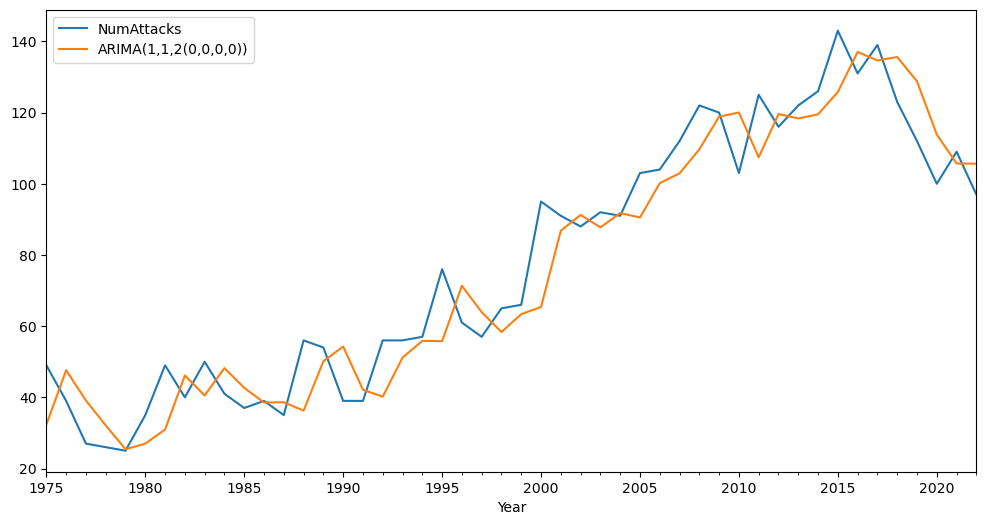

In [113]:
# Predicting 

start = len(myTrain)
end = len(dfy) - 1 ## That gives us the rest of the 24 months
predictions = myModel.predict(start, end, typ='levels').rename('ARIMA(1,1,2(0,0,0,0))')
myTest['NumAttacks'].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True);



In [114]:
from statsmodels.tools.eval_measures import rmse

def report(dftest):
    print ("rmse = ", rmse(myTest['NumAttacks'],predictions))
    print(f'Test Mean: {myTest.NumAttacks.mean()}')
    print(f'Prediction Mean: {predictions.mean()}')
myTest.describe()   

,NumAttacks
count,48.000000
mean,77.875000
std,35.643402
min,25.000000
25%,47.000000
50%,71.000000
75%,109.750000
max,143.000000


In [115]:
report(myTest)

## Results look alright but not fantastic! my RMS is lower that than 1 std deviation and well inside the mean
## The test and prediction means are quite similar too. I will only predict the next 2 years with this

rmse =  10.946344896498088
Test Mean: 77.875
Prediction Mean: 76.02395256197673


In [127]:

##Then we forecast
fmodel = ARIMA(dfy['NumAttacks'], order=(1,1,2)).fit()
sarimamodel  = SARIMAX(dfy['NumAttacks'], order=(1,1,2), seasonal_order=(0,0,0,0)).fit(disp=0)

forecast = fmodel.predict(start=len(dfy), end=len(dfy)+2, typ='levels').rename('ARIMA 2yr months Forecast')

forecast2 = sarimamodel.predict(start=len(dfy), end=len(dfy)+2, typ='levels').rename('SARIMA 2yr months Forecast')

<AxesSubplot:xlabel='Year'>

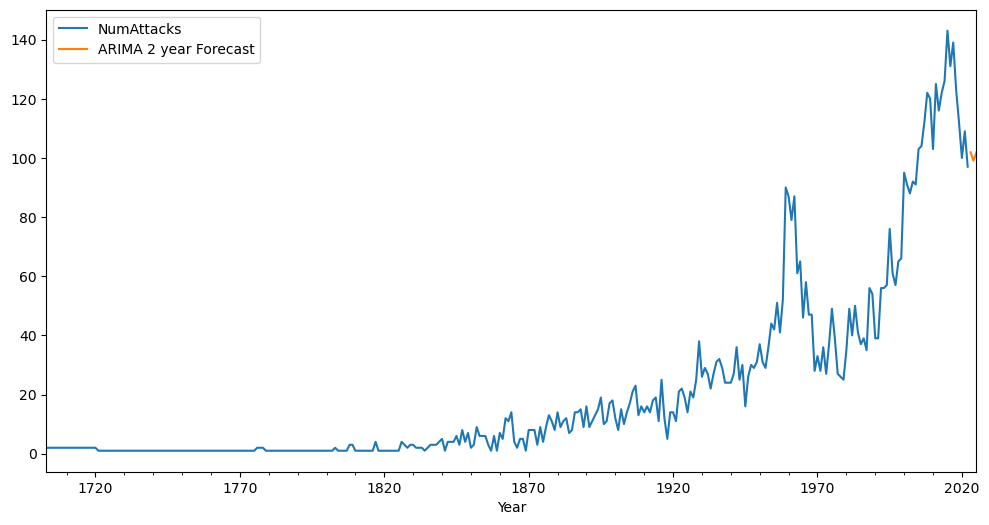

In [128]:
# Visualize our results
dfy['NumAttacks'].plot(legend=True,figsize=(12,6))
forecast.plot(legend=True, label = 'ARIMA 2 year Forecast')
#forecast2.plot(legend=True, label = 'SARIMA 2 year Forecast') is the same;


In [130]:
print(forecast)

2023-01-01    101.893624
2024-01-01     99.082357
2025-01-01    101.771209
Freq: AS-JAN, Name: ARIMA 2yr months Forecast, dtype: float64


In [131]:
#Lets try the same but this time we group the data by months, hopefully we see a better trend at the end!
dfAttacks

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,...,SharkSpecies,full_location,latitude,longitude,pos,Timeslot,Zone,latitude_rad,longitude_rad,risk
0,2023.03.19,3/19/2023,2023.0,Unprovoked,USA,Hawaii,Anaehoomalu Bay,Swimming,male,M,...,unknown,"Anaehoomalu Bay, Hawaii, USA",19.916124,-155.893224,"(19.9161242, -155.8932242)",Midday,TROPIC OF CANCER,0.347602,-2.720850,9.4
1,2023.03.16,3/16/2023,2023.0,Unprovoked,AUSTRALIA,Western Australia,Cheynes Beach,Surf-sking,female,F,...,unknown,"Cheynes Beach, Western Australia, AUSTRALIA",-34.787401,118.417953,"(-34.787401, 118.4179532)",Morning,POLAR,-0.607155,2.066783,10.0
2,2023.03.08,3/6/2023,2023.0,Unprovoked,BRAZIL,Pernambuco,Piedade Beach,Swimming,Kaylane Timóteo Freitas,F,...,unknown,"Piedade Beach, Pernambuco, BRAZIL",-8.167114,-34.913273,"(-8.1671139, -34.91327260000001)",Afternoon,TROPIC OF CAPRICORN,-0.142543,-0.609352,2.1
3,2023.03.05,3/5/2023,2023.0,Unprovoked,BRAZIL,Pernambuco,Piedade Beach,Swimming,male,M,...,unknown,"Piedade Beach, Pernambuco, BRAZIL",-8.167114,-34.913273,"(-8.1671139, -34.91327260000001)",Afternoon,TROPIC OF CAPRICORN,-0.142543,-0.609352,2.1
4,2023.03.02,3/2/2023,2023.0,Unprovoked,SEYCHELLES,Praslin Island,NaN,Snorkeling,Arthur …,M,...,lemon,"Praslin Island, SEYCHELLES",-4.332591,55.746726,"(-4.3325908, 55.74672589999999)",Afternoon,TROPIC OF CAPRICORN,-0.075618,0.972964,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,1742.12.17,1733-01-01,1733.0,Invalid,ICELAND,Bardestrand,Talkknefiord,swimming,NaN,M,...,unknown,"Talkknefiord, Bardestrand, ICELAND",64.963051,-19.020835,"(64.963051, -19.020835)",Afternoon,POLAR,1.133819,-0.331976,1.0
6575,1738.04.06.R,1723-01-01,1723.0,Unprovoked,ROATAN,NaN,NaN,swimming,Philip Ashton,M,...,unknown,", ROATAN",16.329761,-86.529967,"(16.3297608, -86.5299673)",Afternoon,TROPIC OF CANCER,0.285008,-1.510233,1.0
6576,1733.00.00,1721-06-01,1721.0,Unprovoked,ITALY,Sardinia,"Ponte della Maddelena,",Swimming,male,M,...,white shark,"Ponte della Maddelena,, Sardinia, ITALY",40.120875,9.012893,"(40.1208752, 9.012892599999999)",Afternoon,TEMPERATE,0.700241,0.157305,1.6
6577,1703.03.26,1703-03-26,1700.0,Unprovoked,FRANCE,Côte d'Azur,Antibes,Bathing,seaman,M,...,white shark,"Antibes, Côte d'Azur, FRANCE",43.580418,7.125102,"(43.58041799999999, 7.125102)",Afternoon,TEMPERATE,0.760622,0.124356,1.1


In [132]:
date_column = dfAttacks['Date']


# regex pattern for 'dd/mm/yyyy' format
pattern = r'\d{1,2}/\d{1,2}/\d{4}'

# find all occurrences that do not match the pattern
non_matches = date_column[~date_column.str.match(pattern, na=False)]

# print the non-matching occurrences
print(non_matches)

6018    1899-12-18
6019    1899-11-20
6020    1899-10-28
6021    1899-10-12
6022    1899-10-12
           ...    
6574    1733-01-01
6575    1723-01-01
6576    1721-06-01
6577    1703-03-26
6578    1703-03-26
Name: Date, Length: 561, dtype: object


In [134]:
dfAttacks['Date'] = pd.to_datetime(dfAttacks['Date'], errors='coerce')

In [135]:
dfAttacks['Month'] = dfAttacks['Date'].dt.month

In [138]:
dtMonth = dfAttacks.groupby('Month')['Date'].count()

In [141]:
dfAttacks['Year'] = dfAttacks['Date'].dt.year
dfAttacks['Month'] = dfAttacks['Date'].dt.month

In [143]:
grouped_df = dfAttacks.groupby(['Year', 'Month']).size().reset_index(name='Number_of_Attacks')

In [144]:
grouped_df

,Year,Month,Number_of_Attacks
0,1703,3,2
1,1721,6,1
2,1723,1,1
3,1733,1,1
4,1738,4,1
...,...,...,...
1648,2022,11,3
1649,2022,12,6
1650,2023,1,3
1651,2023,2,7


In [151]:
# Define the parameters for the ARIMA model
p = 2
d = 1
q = 2


# p=2: There are significant autocorrelations in the first two lags of the time series plot, suggesting that a model with an AR(2) component may be appropriate.
# d=1: The time series plot shows a clear non-stationarity, which can be addressed by differencing the data once (i.e., d=1).
# q=2: The partial autocorrelation plot shows significant correlations in the first two lags, suggesting that a model with an MA(2) component may be appropriate.

# Create the ARIMA model
arima_model = sm.tsa.ARIMA(grouped_df['Number_of_Attacks'], order=(p, d, q))

# Fit the model to the data
results = arima_model.fit()

# Print the model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:      Number_of_Attacks   No. Observations:                 1653
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3833.186
Date:                Wed, 05 Apr 2023   AIC                           7676.371
Time:                        10:43:54   BIC                           7703.420
Sample:                             0   HQIC                          7686.399
                               - 1653                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7620      0.114     -6.690      0.000      -0.985      -0.539
ar.L2          0.0663      0.028      2.339      0.019       0.011       0.122
ma.L1         -0.0861      0.111     -0.774      0.4

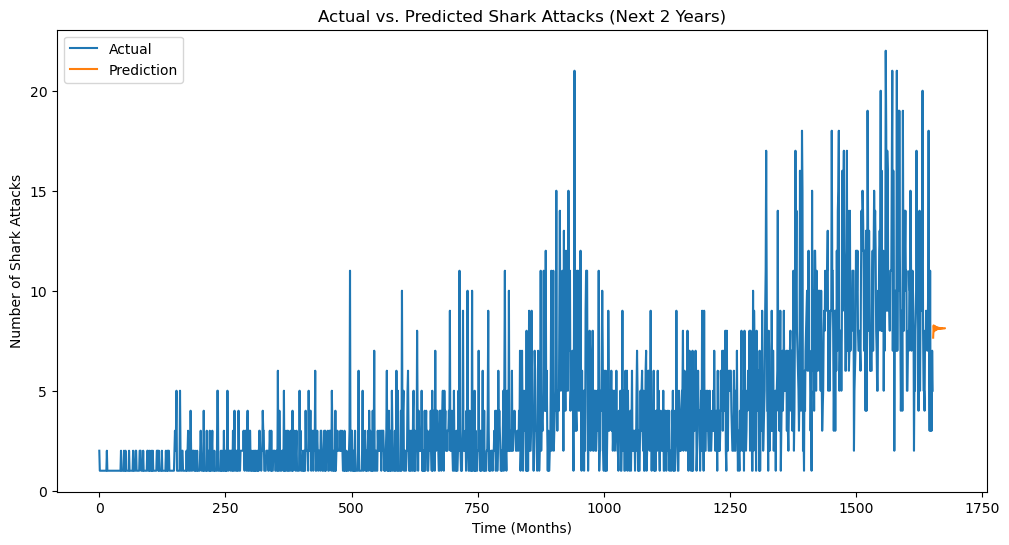

In [153]:
model = ARIMA(grouped_df['Number_of_Attacks'], order=(2,1,2))
model_fit = model.fit()

# Make prediction for next 24 months (2 years)
prediction = model_fit.predict(start=len(grouped_df), end=len(grouped_df)+23, typ='levels')

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

# Plot actual shark attacks
ax.plot(grouped_df.index, grouped_df['Number_of_Attacks'], label='Actual')

# Plot predicted shark attacks
ax.plot(prediction.index, prediction, label='Prediction')
ax.set_xlabel('Time (Months)')
ax.set_ylabel('Number of Shark Attacks')
ax.set_title('Actual vs. Predicted Shark Attacks (Next 2 Years)')
ax.legend()
plt.show()

In [154]:
print(prediction)

1653    7.652787
1654    8.266518
1655    7.974878
1656    8.237818
1657    8.018116
1658    8.202968
1659    8.047540
1660    8.178236
1661    8.068337
1662    8.160748
1663    8.083042
1664    8.148383
1665    8.093440
1666    8.139640
1667    8.100791
1668    8.133458
1669    8.105990
1670    8.129087
1671    8.109665
1672    8.125997
1673    8.112264
1674    8.123811
1675    8.114101
1676    8.122266
Name: predicted_mean, dtype: float64


In [172]:
import calendar
labels = []
for year in range(2023, 2025):
    for month in range(1, 13):
        label = f"{year}_{calendar.month_abbr[month]}".upper()
        labels.append(label)

preds_df = pd.DataFrame({'Predictions':prediction}, index=labels)
preds_df


print(type(prediction))
preds_df['Predictions'] = prediction.to_numpy()
preds_df['Predictions'] = preds_df['Predictions'].apply(lambda x: int(x))

preds_df

####LOOKS LIKE ARIMA Cannot predict the attacks per month too far in advance based on on the data
#So the best we can say is it is prediction about 8 monthly attacks averaged out .. which is reasonable based on this data that has no periodic component

<class 'pandas.core.series.Series'>


,Predictions
2023_JAN,7
2023_FEB,8
2023_MAR,7
2023_APR,8
2023_MAY,8
2023_JUN,8
2023_JUL,8
2023_AUG,8
2023_SEP,8
2023_OCT,8
